In [6]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np

In [7]:
pwd

'/Users/Louis-Philip/PycharmProject/TP4'

## Création du tableau contenant les données


In [8]:
df=pd.read_csv("/Users/Louis-Philip/PycharmProject/TP4/CrimeCitoyen.csv", delimiter=",", parse_dates=["DATE"])
df['CATEGORIE'] = df['CATEGORIE'].str.replace(u"�", "e")
df['CATEGORIE'] = df['CATEGORIE'].str.replace(u"vehicule e moteur", "vehicule a moteur")
df.head()

,CATEGORIE,DATE,QUART,PDQ,X,Y,LONGITUDE,LATITUDE
0,Vol de vehicule a moteur,2018-09-13,jour,30.0,294904.159001,5.047549e+06,-73.626778,45.567780
1,Vol de vehicule a moteur,2018-04-30,jour,30.0,294904.159001,5.047549e+06,-73.626778,45.567780
2,Vol de vehicule a moteur,2018-09-01,nuit,7.0,290274.565000,5.042150e+06,-73.685928,45.519122
3,Mefait,2017-07-21,jour,21.0,0.000000,0.000000e+00,1.000000,1.000000
4,Mefait,2017-07-29,jour,12.0,0.000000,0.000000e+00,1.000000,1.000000


## Création de deux nouvelles colonnes contenant le mois du crime et l'année du crime

In [9]:
df['YEAR'] = pd.DatetimeIndex(df['DATE']).year
df['MONTH'] = pd.DatetimeIndex(df['DATE']).month
df.head()

,CATEGORIE,DATE,QUART,PDQ,X,Y,LONGITUDE,LATITUDE,YEAR,MONTH
0,Vol de vehicule a moteur,2018-09-13,jour,30.0,294904.159001,5.047549e+06,-73.626778,45.567780,2018,9
1,Vol de vehicule a moteur,2018-04-30,jour,30.0,294904.159001,5.047549e+06,-73.626778,45.567780,2018,4
2,Vol de vehicule a moteur,2018-09-01,nuit,7.0,290274.565000,5.042150e+06,-73.685928,45.519122,2018,9
3,Mefait,2017-07-21,jour,21.0,0.000000,0.000000e+00,1.000000,1.000000,2017,7
4,Mefait,2017-07-29,jour,12.0,0.000000,0.000000e+00,1.000000,1.000000,2017,7


## Nombre de crime effectué par année

2015    35609
2016    33760
2017    32664
2018    28387
2019    27155
2020    25460
2021     5571
Name: YEAR, dtype: int64


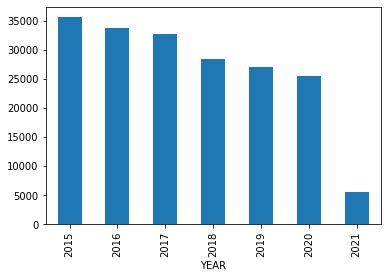

In [10]:
Crime_par_année=df["YEAR"].value_counts()
print(Crime_par_année)
df.groupby(["YEAR"]).size().plot(kind='bar')
plt.show()

In [11]:
moyenne_par_annee=Crime_par_année.mean()
ecart_type_par_annee=Crime_par_année.mean()
moyenne_par_annee=moyenne_par_annee.round(2)
ecart_type_par_annee=ecart_type_par_annee.round(2)
print("La moyenne de crime par année est de " + str(moyenne_par_annee) + " par année")

print("L'écart-type de ce nombre est de " + str(ecart_type_par_annee) + " crimes")

La moyenne de crime par année est de 26943.71 par année
L'écart-type de ce nombre est de 26943.71 crimes


## Nombre de crime par année par catégorie de crime


In [12]:
df.groupby(['YEAR', 'CATEGORIE']).size()

YEAR  CATEGORIE                       
2015  Infractions entrainant la mort         27
      Introduction                         9796
      Mefait                               8356
      Vol dans / sur vehicule a moteur    10915
      Vol de vehicule a moteur             4418
      Vols qualifies                       2097
2016  Infractions entrainant la mort         23
      Introduction                         9797
      Mefait                               7405
      Vol dans / sur vehicule a moteur    10209
      Vol de vehicule a moteur             4352
      Vols qualifies                       1974
2017  Infractions entrainant la mort         26
      Introduction                         9197
      Mefait                               7302
      Vol dans / sur vehicule a moteur     9556
      Vol de vehicule a moteur             4732
      Vols qualifies                       1851
2018  Infractions entrainant la mort         31
      Introduction                         7429
 

## Catégorie des crimes et leur nombre par année sous forme graphique


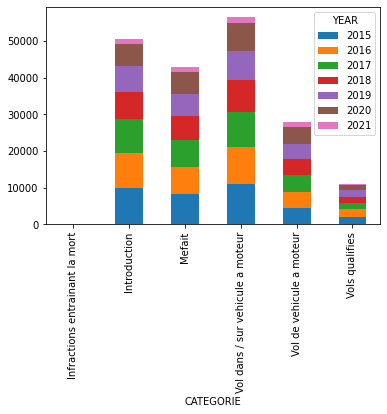

In [8]:
df.groupby(['CATEGORIE','YEAR']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

## Regarder la corrélation entre les crimes et le temps de la journée (nuit ou jour)

In [13]:
print(df.groupby(['CATEGORIE','QUART']).size())

CATEGORIE                         QUART
Infractions entrainant la mort    jour        38
                                  nuit        61
                                  soir        65
Introduction                      jour     22281
                                  nuit      9191
                                  soir     18938
Mefait                            jour     24167
                                  nuit      5344
                                  soir     13284
Vol dans / sur vehicule a moteur  jour     31048
                                  nuit      5452
                                  soir     19946
Vol de vehicule a moteur          jour     14103
                                  nuit      6404
                                  soir      7276
Vols qualifies                    jour      3543
                                  nuit      2016
                                  soir      5449
dtype: int64
